<a href="https://colab.research.google.com/github/GMFaraaz/life-expectancy-analysis/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Life Expectancy Analysis 🌍**
# Section 1 - Setup

In this notebook, we will explore global life expectancy data to understand how factors like GDP, schooling, and health indicators affect how long people live.  
We'll analyze, clean, and visualize the dataset step-by-step to find meaningful insights.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


## Upload Dataset

We'll upload the Life Expectancy CSV downloaded from Kaggle.
This ensures the notebook works reliably in Colab without broken URLs.


In [9]:
url = "https://raw.githubusercontent.com/GMFaraaz/life-expectancy-analysis/refs/heads/main/Life%20Expectancy%20Data.csv"
df = pd.read_csv(url)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Dataset Overview

Check dataset size, columns, and structure to understand what we're working with.


In [10]:
df.shape


(2938, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
df.columns = (df.columns
                .str.strip()
                .str.lower()
                .str.replace(' ', '_')
                .str.replace('(', '')
                .str.replace(')', '')
                .str.replace('/', '_'))
df.columns.tolist()


['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

# Section 2 — Exploratory Data Analysis (EDA)

Now that the dataset is loaded, let's explore its structure, identify missing values, and get a sense of how life expectancy varies by different features.


In [13]:
# Summary of numeric columns
df.describe().round(2)


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


## Checking Missing Values and Duplicates

We'll identify which columns have missing data and check if there are any duplicate records.


In [14]:
print("Missing values per column:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Duplicate rows: 0


## Unique Value Counts

Let's see how many unique countries and years are included in the dataset, and how the data is categorized by development status.


In [15]:
print("Unique countries:", df['country'].nunique())
print("Years covered:", df['year'].min(), "to", df['year'].max())
print("\nDevelopment Status counts:\n", df['status'].value_counts(dropna=False))


Unique countries: 193
Years covered: 2000 to 2015

Development Status counts:
 status
Developing    2426
Developed      512
Name: count, dtype: int64


## Average Life Expectancy by Country

Let's identify the top countries with the highest average life expectancy.


In [16]:
country_avg = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)
country_avg.head(10)


,life_expectancy
country,
Japan,82.53750
Sweden,82.51875
Iceland,82.44375
Switzerland,82.33125
France,82.21875
Italy,82.18750
Spain,82.06875
Australia,81.81250
Norway,81.79375


## Life Expectancy Distribution

We'll visualize the distribution of life expectancy values to understand the overall spread and average range.


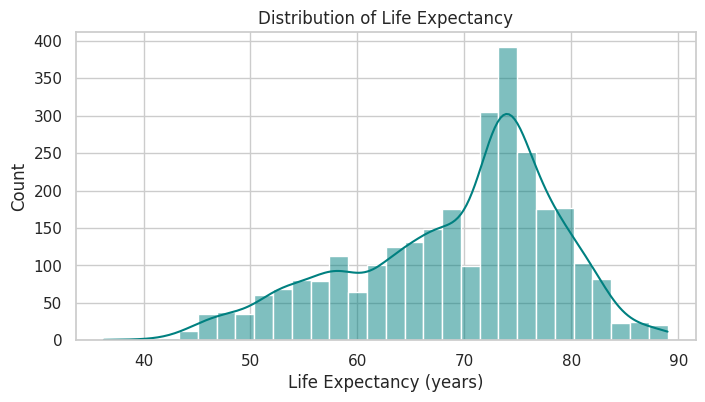

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['life_expectancy'].dropna(), kde=True, color='teal')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Count')
plt.show()


# Section 3 — Preprocessing

Before deeper analysis, we'll clean the dataset:
- Remove rows missing life expectancy (our main target variable)
- Fill missing numeric values with column mean
- Normalize column names (already done)
- Document what we did and what we didn't (useful for the PPT)


In [18]:
# Drop rows where life_expectancy is missing
before = df.shape[0]
df = df.dropna(subset=['life_expectancy'])
after = df.shape[0]
print(f"Dropped {before - after} rows with missing life_expectancy. Remaining rows: {after}")


Dropped 10 rows with missing life_expectancy. Remaining rows: 2928


## Fill Remaining Numeric Missing Values

For numeric columns other than life expectancy, we fill missing values with the column mean.
This preserves data for analysis without introducing bias in our main variable.


In [19]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Confirm no numeric missing values remain
df[num_cols].isna().sum().sum()


np.int64(0)

## Verify Dataset

Check that all missing values are handled and see the dataset shape after cleaning.


In [20]:
print("Total missing values remaining (all columns):", df.isna().sum().sum())
df.shape


Total missing values remaining (all columns): 0


(2928, 22)

## Save Cleaned Dataset (Optional)

Saving a cleaned copy can help with reproducibility and allows us to run the notebook without errors.


In [21]:
clean_path = "life_expectancy_cleaned.csv"
df.to_csv(clean_path, index=False)
print(f"Saved cleaned dataset as {clean_path}")


Saved cleaned dataset as life_expectancy_cleaned.csv


# Section 4 — Deeper Analysis

Now that the dataset is clean, we'll explore relationships between life expectancy and other numeric variables like GDP, schooling, and health indicators. We'll also visualize trends over time and by development status.


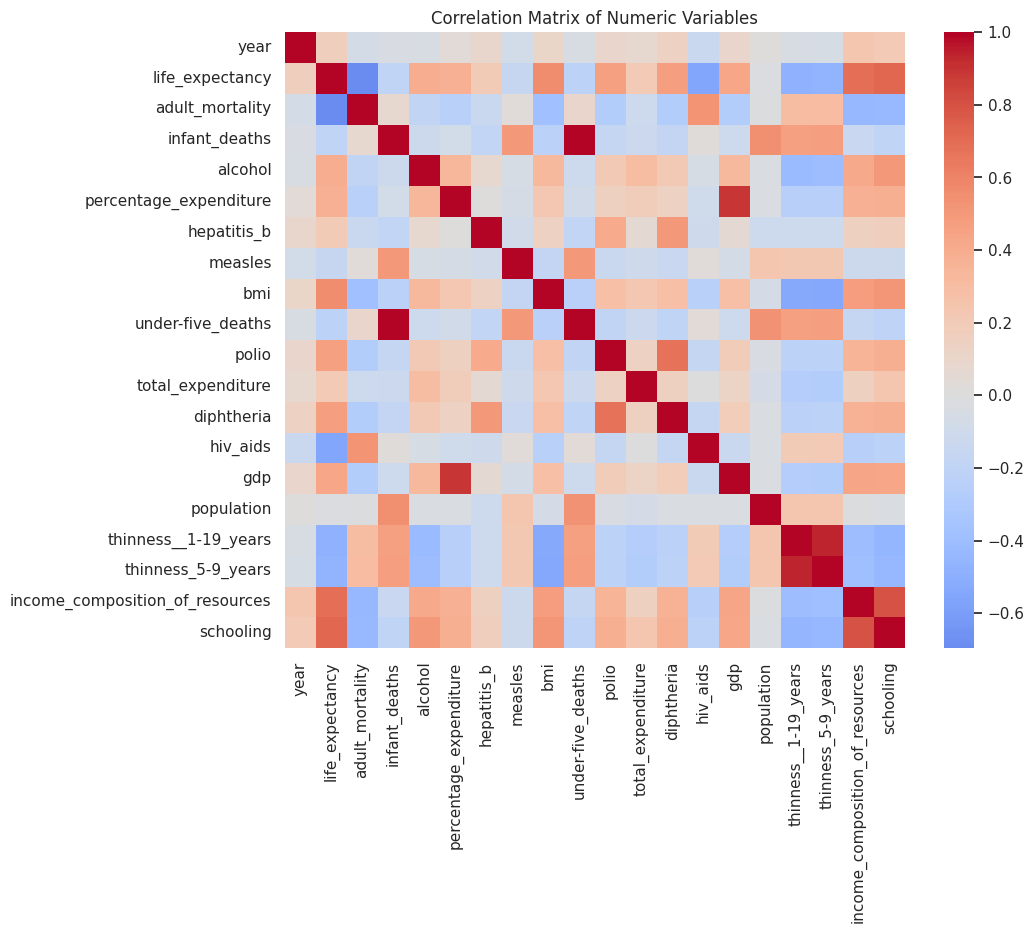

,life_expectancy
life_expectancy,1.000000
schooling,0.718614
income_composition_of_resources,0.692621
bmi,0.562453
diphtheria,0.476442
polio,0.462592
gdp,0.430551
alcohol,0.392420
percentage_expenditure,0.381864
total_expenditure,0.209628


In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64','int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Top correlations with life expectancy
corr_with_target = corr['life_expectancy'].sort_values(ascending=False)
corr_with_target.head(10)


## GDP vs Life Expectancy

Visualizing how GDP relates to life expectancy, with color indicating development status.


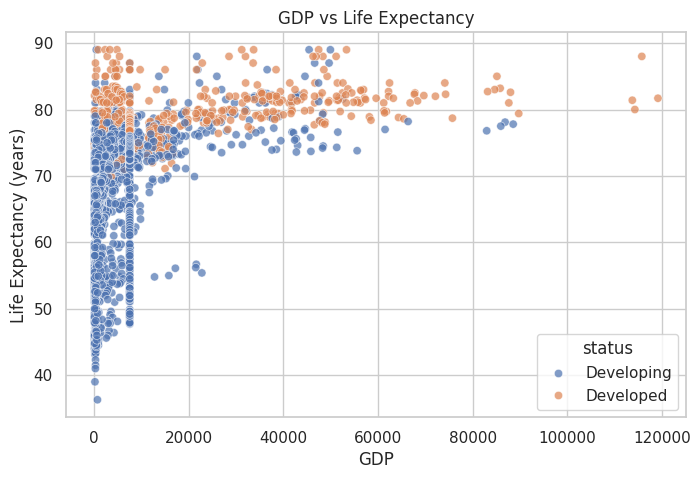

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='gdp', y='life_expectancy', hue='status', alpha=0.7, data=df)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()


## Schooling vs Life Expectancy

Examining the effect of average years of schooling on life expectancy.


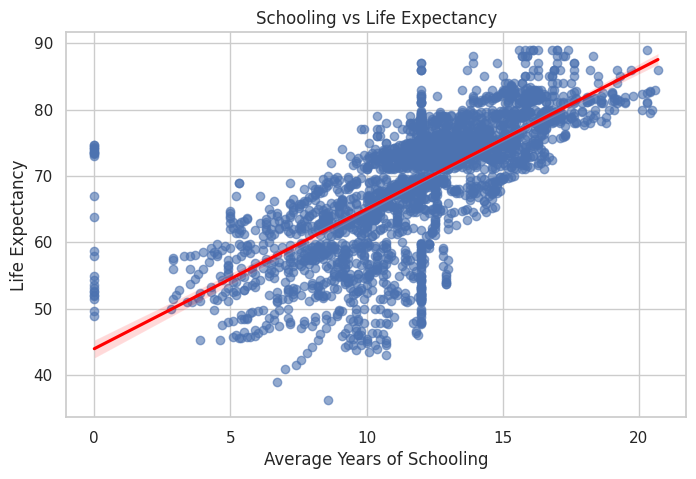

In [24]:
plt.figure(figsize=(8,5))
sns.regplot(x='schooling', y='life_expectancy', scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, data=df)
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Life Expectancy')
plt.show()


## Global Trend Over Time

Plotting average life expectancy per year to observe global trends.


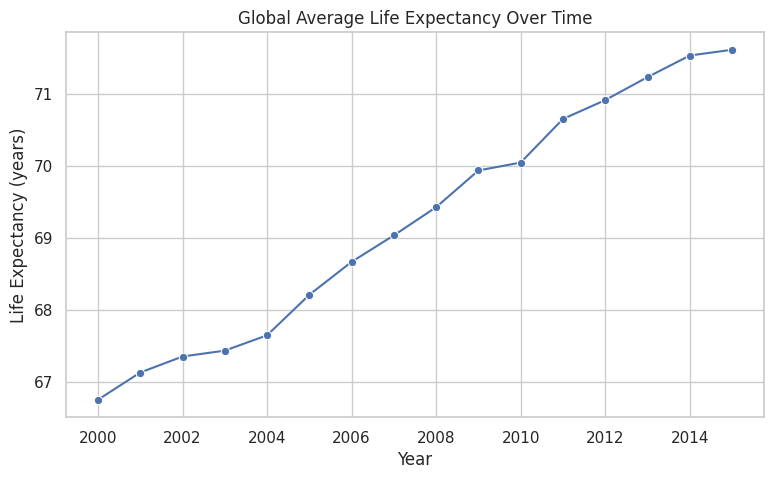

In [25]:
plt.figure(figsize=(9,5))
yearly = df.groupby('year')['life_expectancy'].mean()
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.show()


## Life Expectancy by Development Status

Compare life expectancy between developed and developing countries using a boxplot.


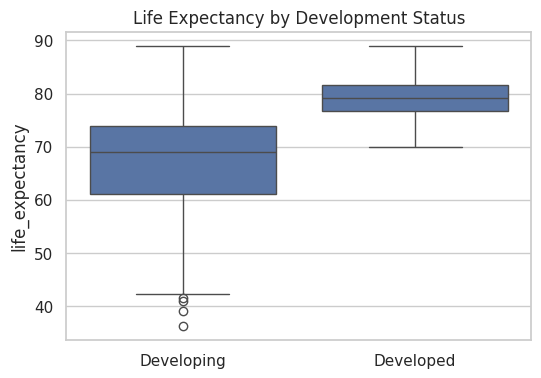

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title('Life Expectancy by Development Status')
plt.xlabel('')
plt.show()


## Country-Level Improvement

Calculate the change in life expectancy for each country between the earliest and latest recorded year.


In [27]:
country_first = df.groupby('country').first()['life_expectancy']
country_last = df.groupby('country').last()['life_expectancy']
improvement = (country_last - country_first).sort_values(ascending=False)

# Show top 10 countries with largest improvement
improvement.head(10)


,life_expectancy
country,
Syrian Arab Republic,8.1
Saint Vincent and the Grenadines,5.8
Libya,5.3
Paraguay,5.0
Yemen,2.3
Romania,2.0
Iraq,1.1
Grenada,0.4
Estonia,0.4


# Section 5 — Mini Regression

We'll run a simple linear regression using numeric features to see which factors are most associated with life expectancy.
This is for insight purposes only, not prediction.


In [28]:
from sklearn.linear_model import LinearRegression

# Select numeric features except life_expectancy
features = numeric_df.drop(columns=['life_expectancy'])
target = numeric_df['life_expectancy']

# Quick check
features.head()


,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Fit Linear Regression

We fit a linear regression model and inspect the coefficients to see which features have the strongest relationship with life expectancy.


In [29]:
# Fit regression
model = LinearRegression()
model.fit(features, target)

# Coefficients
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df


,Feature,Coefficient
17,income_composition_of_resources,5.909502e+00
18,schooling,6.895641e-01
3,alcohol,1.160615e-01
2,infant_deaths,9.895114e-02
10,total_expenditure,8.254740e-02
7,bmi,4.308970e-02
11,diphtheria,4.000219e-02
9,polio,2.885217e-02
4,percentage_expenditure,1.283649e-04
13,gdp,3.715892e-05


## Regression Insights

The coefficient values tell us the direction and strength of the relationship between each numeric feature and life expectancy.
- Positive coefficient → feature associated with higher life expectancy
- Negative coefficient → feature associated with lower life expectancy


# Section 6 — Conclusion & Key Visualizations

In this final section, we summarize the main insights from the analysis:

1. **Global Life Expectancy Trends**
   - Life expectancy has increased over the years globally.
   - Some countries have improved more than others (top 10 improvements identified).

2. **Factors Associated with Life Expectancy**
   - GDP and schooling show positive correlation with life expectancy.
   - Regression confirms numeric features like schooling, BMI, and immunization coverage have strong influence.

3. **Differences by Development Status**
   - Developed countries generally have higher life expectancy.
   - Developing countries show more variation.

4. **Country-level Highlights**
   - Top countries by average life expectancy identified.
   - Countries with largest improvements over time identified.

**Key visualizations**:
  1. Correlation heatmap
  2. GDP vs Life Expectancy scatter
  3. Schooling vs Life Expectancy regression
  4. Life Expectancy over time line plot
  5. Boxplot by development status


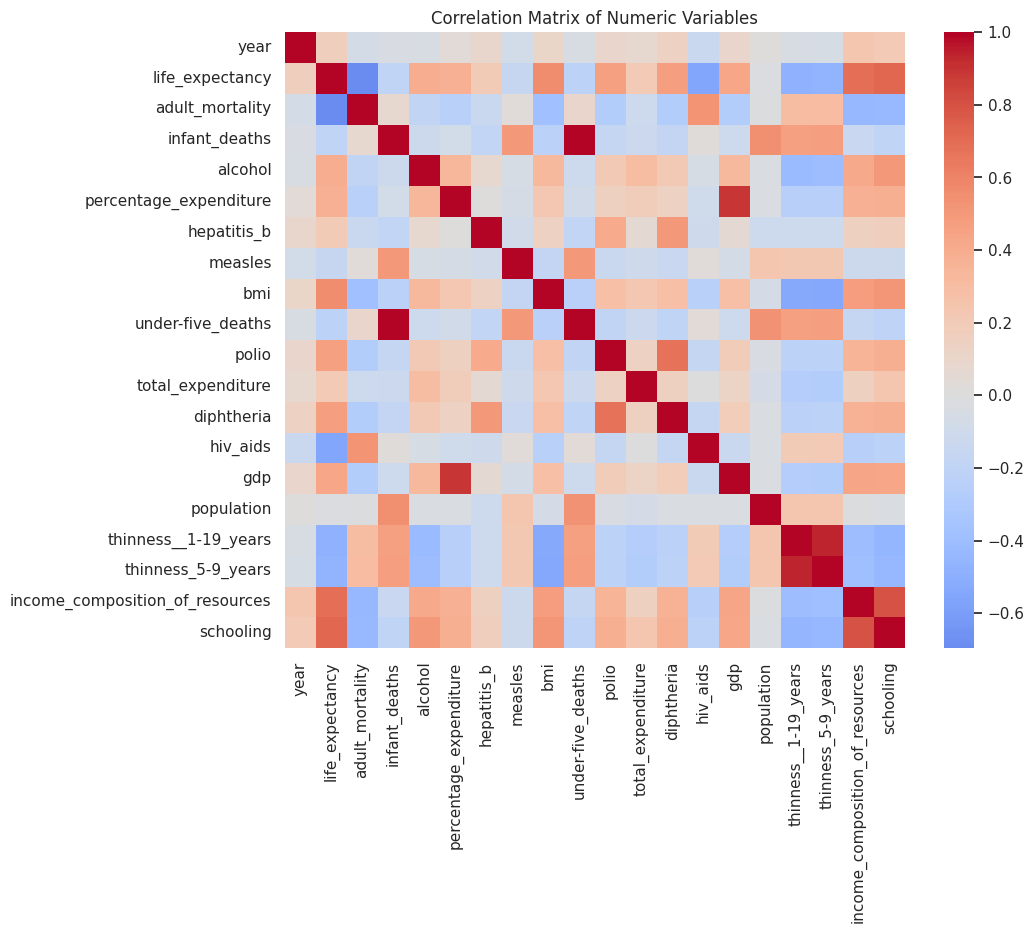

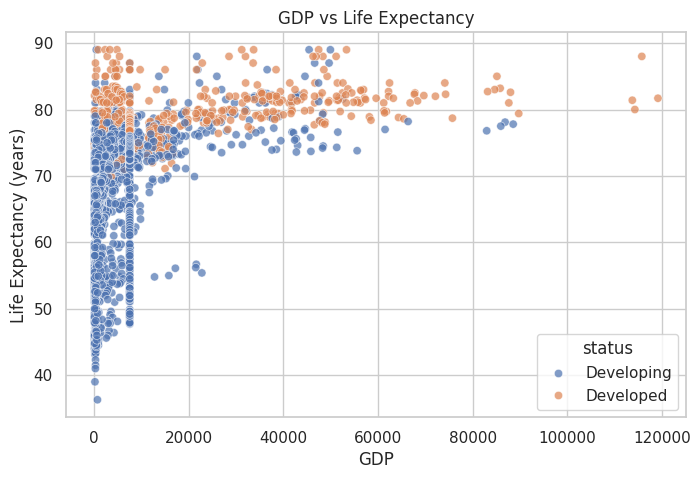

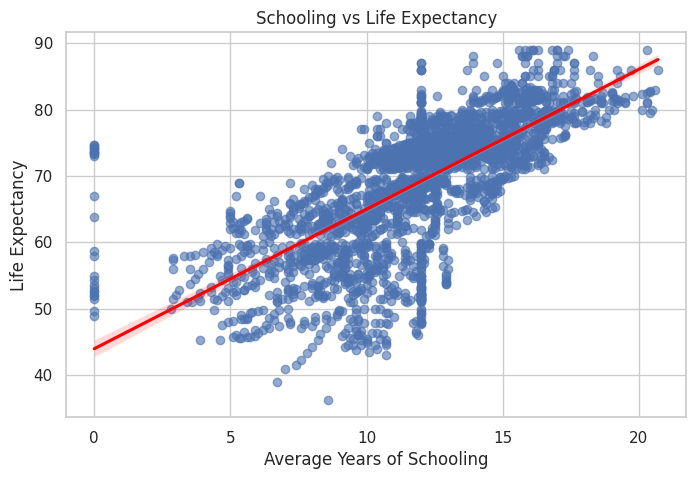

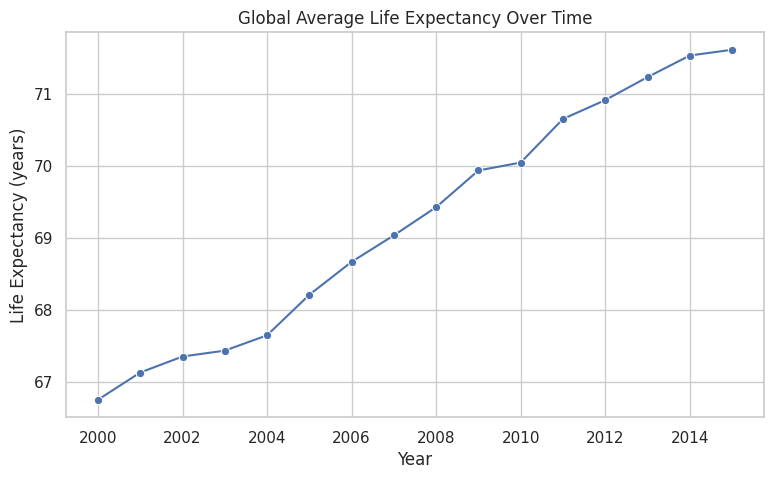

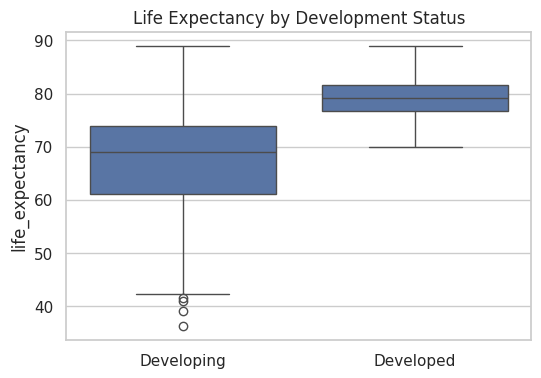

In [30]:
# 1️⃣ Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# 2️⃣ GDP vs Life Expectancy
plt.figure(figsize=(8,5))
sns.scatterplot(x='gdp', y='life_expectancy', hue='status', alpha=0.7, data=df)
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()

# 3️⃣ Schooling vs Life Expectancy
plt.figure(figsize=(8,5))
sns.regplot(x='schooling', y='life_expectancy', scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, data=df)
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Life Expectancy')
plt.show()

# 4️⃣ Life Expectancy Over Time
plt.figure(figsize=(9,5))
yearly = df.groupby('year')['life_expectancy'].mean()
sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
plt.title('Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.show()

# 5️⃣ Boxplot by Development Status
plt.figure(figsize=(6,4))
sns.boxplot(x='status', y='life_expectancy', data=df)
plt.title('Life Expectancy by Development Status')
plt.xlabel('')
plt.show()
